In [468]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [469]:
df = pd.read_csv('Опросник для исследования.csv')
df = df.loc[df['Ваш GPA за первый семестр первого курса (используйте точку в качестве разделителя, пример 3.0)'] != '-']
df = df.loc[df['Ваш GPA за первый семестр первого курса (используйте точку в качестве разделителя, пример 3.0)'] != '?']
df = df.loc[df['Ваш GPA за первый семестр первого курса (используйте точку в качестве разделителя, пример 3.0)'] != '1 курс']
df.drop(list(df.filter(regex = 'Отзыв')), axis = 1, inplace = True)
df.drop(list(df.filter(regex = 'Количество баллов')), axis = 1, inplace = True)
df = df.drop(['Отметка времени', 'Отметьте из списка эти ветви власти ', 'Сколько длится президентский срок? (напишите только цифру)', 'Из каких палат состоит Парламент? (выберите несколько)', 'Действующий премьер-министр РК', 'Экономическая система РК', 'Является ли РК светским государством?', 'Сколько сроков подряд можно избираться президентом? (напишите только цифру)', 'Выберите государственные символы', 'Может ли Президент быть досрочно освобожден от должности решением Парламента?', 'Как называется процедура отстранения президента от должности?', 'Знаете ли вы имя акима вашего населенного пункта?'], axis = 1)
df.drop(['Сколько существует ветвей власти? (напишите только цифру)'], axis = 1, inplace = True)
df.shape

(69, 26)

In [470]:
df = df.rename({'Всего баллов': 'score', 'Ваш GPA за первый семестр первого курса (используйте точку в качестве разделителя, пример 3.0)': 'gpa'}, axis=1)
df = df.rename({'Пол': 'male', 'Возраст': 'age', 'Где вы проживали на момент учебы в школе?': 'city', 'Язык обучения в вашем классе': 'lang', 'Частная или государственная школа': 'private', 'Формат школы': 'type', 'Знание английского на момент обучения в школе': 'english'}, axis=1)
df = df.rename({'Ваша успеваемость в школе': 'gpa_school', 'Посещали репетиторов во время школы?': 'tutors', 'Посещали спортивные секции во время школы?': 'sport', 'Занимались творчеством (рисование/рукоделие/театр)?': 'art', 'Имелся ли в школе интернет?': 'internet', 'Есть ли высшее образование у ваших родителей (хотя бы у одного)?': 'edu_parents', 'Средняя зп в месяц ваших родителей (суммарно) во время вашего обучения в школе': 'wage', 'Смотрите/читаете новости': 'news', 'Основной источник новостей': 'news_source', 'Проявляли политическую активность (были наблюдателями на выборах например)': 'activism', 'Участник молодежных организаций (МИСК, молодежное крыло полит партии и другое)': 'organization', 'Сталкивались с несправедливостью': 'injustice', 'Интересуетесь политикой': 'interest'}, axis=1)
df = df.rename({'Интересуются ли родители политикой': 'interest_parents', 'Ходят ли ваши родители на выборы?': 'vote_parents', 'Насколько устраивает жизнь в КЗ': 'satisfaction', 'Имелись ли в вашем населенном пункте культурные объекты (библиотеки/музеи/американские уголки/мастерские/театры)?': 'city_culture'}, axis=1)
df.columns
df = df.replace({'news_source':{'Блоггеры': 'bloggers', 'Новостные порталы в интернете': 'news_portals', 'Паблики в соц сетях': 'social_meadia', 'Телевизор': 'TV'}})
df = df.replace({'satisfaction':{'Да, устраивает': 'Yes,satisfied', 'Затрудняюсь ответить': 'Cannot answer', 'Нет, не устраивает': 'No,not satisfied', 'Скорее не устраивает': 'Rather not satisfied', 'Скорее устраивает': 'Rather satisfied'}})


In [471]:
le = LabelEncoder()
y = le.fit_transform(df['lang'])
y
#rus = 1
df['lang'] = y

In [472]:
y = le.fit_transform(df['private'])
y
#private = 1
df['private'] = y

In [473]:
y = le.fit_transform(df['male'])
y
#male = 1
df['male'] = y

In [474]:
y = le.fit_transform(df['city'])
y
#city = 0
df['city'] = y
df = df.rename({'city': 'village'}, axis = 1)

In [475]:
df = df.replace('Да', 1)
df = df.replace('Нет', 0)

In [476]:
df['score'] = df['score'].apply(lambda x: x.split('/')[0].strip())
df = df.astype({"score": float})

In [477]:
df.loc[df['gpa'] == '1,67']
df = df.replace('1,67', '1.67')
df.loc[df['gpa'] == '1,67']
df.loc[df['gpa'] == '2,8']
df = df.replace('2,8', '2.8')
df.loc[df['gpa'] == '2,8']
df.loc[df['gpa'] == '2,76']
df = df.replace('2,76', '2.76')
df.loc[df['gpa'] == '2,76']
df = df.astype({"gpa": float})


In [478]:
X = df.copy()
X = X.replace('50 000 - 100 000', '75000')
X = X.replace('100 000 - 200 000', '150000')
X = X.replace('200 000 - 300 000', '250000')
X = X.replace('300 000 - 400 000', '350000')
X = X.replace('400 000 - 500 000', '450000')
X = X.replace('500 000 и больше', '600000')
X = X.astype({"wage": int})
print(X.shape)
X = X.drop(['score', 'lang', 'private', 'type', 'english', 'gpa_school', 'gpa', 'tutors', 'sport', 'art', 'internet'], axis=1)
X = pd.get_dummies(data=X)
#X = X.rename({'news_source_Блоггеры': 'news_source_bloggers', 'news_source_Новостные порталы в интернете': 'news_source_news_portals', 'news_source_Паблики в соц сетях': 'news_source_social_meadia', 'news_source_Телевизор': 'news_source_TV'}, axis=1)
#X = X.rename({'satisfaction_Да, устраивает': 'satisfaction_Yes,satisfied', 'satisfaction_Затрудняюсь ответить': 'satisfaction_Cannot answer', 'satisfaction_Нет, не устраивает': 'satisfaction_No,not satisfied', 'satisfaction_Скорее не устраивает': 'satisfaction_Rather not satisfied', 'satisfaction_Скорее устраивает': 'satisfaction_Rather satisfied'}, axis=1)

#X = X.drop(['news_source_Новостные порталы в интернете','news_source_Блоггеры', 'satisfaction_Скорее устраивает', 'satisfaction_Затрудняюсь ответить', 'satisfaction_Скорее не устраивает', 'satisfaction_Нет, не устраивает', 'news_source_Телевизор'], axis=1)

y = df['score']

X = sm.add_constant(X)
model = sm.OLS(y, X)

results = model.fit()

print(results.summary())


(69, 26)
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     2.299
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00944
Time:                        14:00:09   Log-Likelihood:                -139.43
No. Observations:                  69   AIC:                             320.9
Df Residuals:                      48   BIC:                             367.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [447]:
#from sklearn import preprocessing

#x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True)

#regr = linear_model.LinearRegression()

#regr.fit(x_train, y_train)

#regr.score(x_test, y_test)
#why regression is so changable

In [461]:
X.columns

Index(['const', 'male', 'age', 'village', 'edu_parents', 'wage', 'news',
       'activism', 'organization', 'injustice', 'interest', 'interest_parents',
       'vote_parents', 'city_culture', 'news_source_bloggers',
       'news_source_news_portals', 'news_source_social_meadia',
       'news_source_TV', 'satisfaction_Yes,satisfied',
       'satisfaction_Cannot answer', 'satisfaction_No,not satisfied',
       'satisfaction_Rather not satisfied', 'satisfaction_Rather satisfied'],
      dtype='object')

LASSO best alpha:  0.08504489341802678


<AxesSubplot:xlabel='lasso_coeff', ylabel='features'>

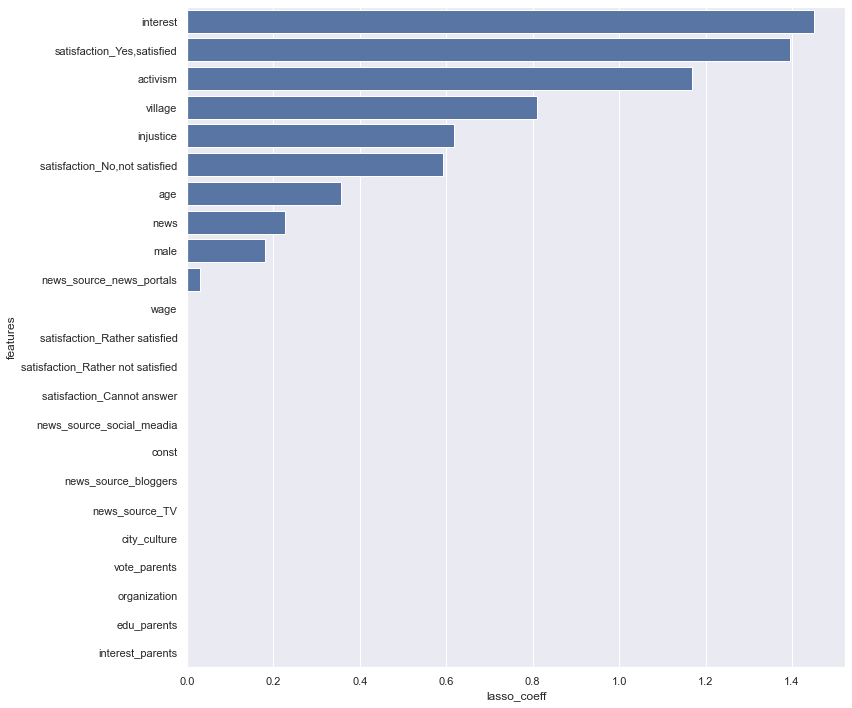

In [479]:
from sklearn.linear_model import LassoCV

#LassoCV to find the optimal alpha value for L1 regularization
alphavec = 10**np.linspace(-3,3,200) 
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X, y)

print("LASSO best alpha: ", lasso_model.alpha_ )# display all coefficients in the model with optimal alpha

feature_coefs = list(zip(X.columns, lasso_model.coef_))

feature_coefs = pd.DataFrame(feature_coefs, columns = ["features", "lasso_coeff"])
feature_coefs["lasso_coeff"] = np.abs(feature_coefs["lasso_coeff"]) 
feature_coefs.sort_values(by = "lasso_coeff", ascending=False, inplace=True)

sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(y = feature_coefs.features, x = feature_coefs.lasso_coeff, color='b')

In [481]:
features_significant = feature_coefs.features[feature_coefs.lasso_coeff >= 0.015]
features_significant
#by p-values: activism, injustice, interest, новостные порталы, паблики, да устраивает, затрудняюсь, скорее не устраивает, устраивает

10                         interest
22       satisfaction_Yes,satisfied
7                          activism
3                           village
9                         injustice
19    satisfaction_No,not satisfied
2                               age
6                              news
1                              male
16         news_source_news_portals
Name: features, dtype: object

In [484]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

coeff_parameter = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter.sort_values(by='Coefficient', ascending=False)


,Coefficient
interest,1.837146e+00
"satisfaction_Yes,satisfied",1.523145e+00
news_source_social_meadia,1.444559e+00
organization,1.201895e+00
news,9.170489e-01
edu_parents,8.955035e-01
news_source_news_portals,8.449446e-01
satisfaction_Cannot answer,7.865271e-01
city_culture,6.085635e-01
satisfaction_Rather satisfied,7.852920e-02


In [322]:
#X = df.copy()
#print(X.shape)
#X = X.drop(['lang', 'private', 'type', 'english', 'gpa_school', 'gpa', 'tutors', 'sport', 'art', 'internet'], axis=1)
#X = X.drop(['news_source', 'satisfaction'], axis=1)
#X = pd.get_dummies(data=X)
#corm = X.corr()
#print(corm['score'].sort_values(ascending=False))
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#plt.rcParams["figure.figsize"] = (10,10)
#sns.heatmap(corm, cmap=colormap, annot = True, fmt='.2f')

In [485]:
plt.rcParams["figure.figsize"] = (7,3)

(69, 26)
social_meadia    37
news_portals     28
bloggers          3
TV                1
Name: news_source, dtype: int64
social_meadia    0.536232
news_portals     0.405797
bloggers         0.043478
TV               0.014493
Name: news_source, dtype: float64


<AxesSubplot:>

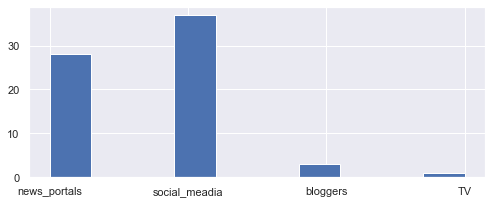

In [486]:
X = df.copy()
print(X.shape)
X = X.drop(['lang', 'private', 'type', 'english', 'gpa_school', 'gpa', 'tutors', 'sport', 'art', 'internet'], axis=1)

print(X['news_source'].value_counts())
print(X['news_source'].value_counts(normalize=True))
X['news_source'].hist()

Rather satisfied        21
Rather not satisfied    20
Cannot answer           12
No,not satisfied        11
Yes,satisfied            5
Name: satisfaction, dtype: int64
Rather satisfied        0.304348
Rather not satisfied    0.289855
Cannot answer           0.173913
No,not satisfied        0.159420
Yes,satisfied           0.072464
Name: satisfaction, dtype: float64


<AxesSubplot:>

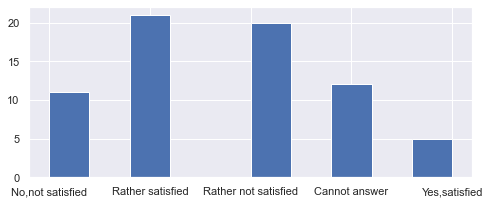

In [487]:
print(X['satisfaction'].value_counts())
print(X['satisfaction'].value_counts(normalize=True))
X['satisfaction'].hist()

1    46
0    23
Name: male, dtype: int64
1    0.666667
0    0.333333
Name: male, dtype: float64


<AxesSubplot:>

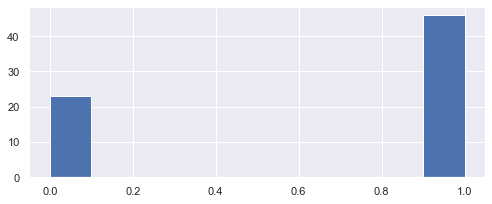

In [488]:
print(X['male'].value_counts())
print(X['male'].value_counts(normalize=True))
X['male'].hist()
#male - 1, fem - 0

19    22
20    18
18    16
21    10
17     2
22     1
Name: age, dtype: int64
19    0.318841
20    0.260870
18    0.231884
21    0.144928
17    0.028986
22    0.014493
Name: age, dtype: float64


<AxesSubplot:>

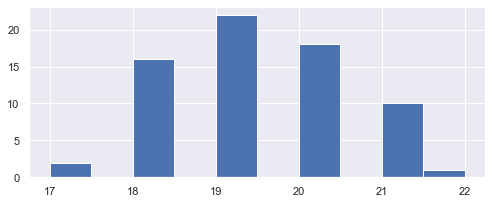

In [489]:
print(X['age'].value_counts())
print(X['age'].value_counts(normalize=True))

X['age'].hist()

0    57
1    12
Name: village, dtype: int64
0    0.826087
1    0.173913
Name: village, dtype: float64


<AxesSubplot:>

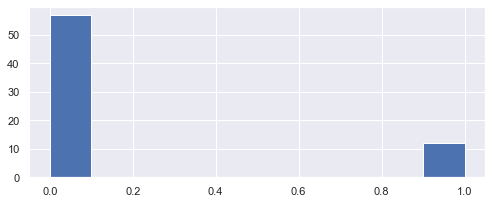

In [490]:
print(X['village'].value_counts())
print(X['village'].value_counts(normalize=True))
X['village'].hist()
#village - 1, city - 0

1    60
0     9
Name: edu_parents, dtype: int64
1    0.869565
0    0.130435
Name: edu_parents, dtype: float64


<AxesSubplot:>

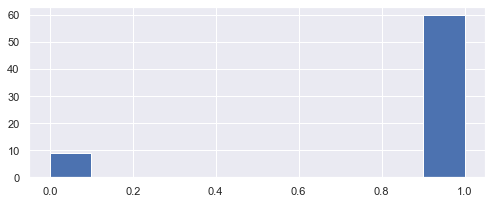

In [491]:
print(X['edu_parents'].value_counts())
print(X['edu_parents'].value_counts(normalize=True))
X['edu_parents'].hist()
#have hgher ed - 1, no higher ed - 0

200 000 - 300 000    19
400 000 - 500 000    13
500 000 и больше     12
100 000 - 200 000    11
300 000 - 400 000    10
50 000 - 100 000      4
Name: wage, dtype: int64
200 000 - 300 000    0.275362
400 000 - 500 000    0.188406
500 000 и больше     0.173913
100 000 - 200 000    0.159420
300 000 - 400 000    0.144928
50 000 - 100 000     0.057971
Name: wage, dtype: float64


<AxesSubplot:>

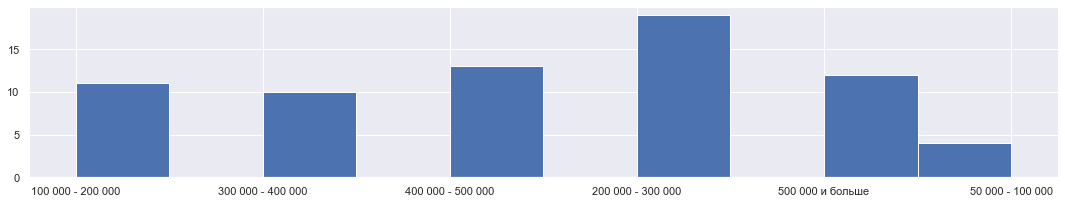

In [492]:
plt.rcParams["figure.figsize"] = (15,3)
print(X['wage'].value_counts())
print(X['wage'].value_counts(normalize=True))
X['wage'].hist()

0    62
1     7
Name: activism, dtype: int64
0    0.898551
1    0.101449
Name: activism, dtype: float64


<AxesSubplot:>

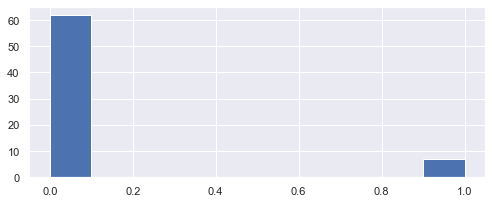

In [493]:
plt.rcParams["figure.figsize"] = (7,3)
print(X['activism'].value_counts())
print(X['activism'].value_counts(normalize=True))
X['activism'].hist()

0    66
1     3
Name: organization, dtype: int64
0    0.956522
1    0.043478
Name: organization, dtype: float64


<AxesSubplot:>

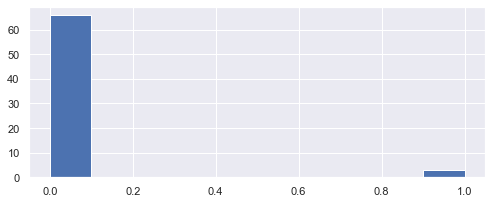

In [494]:
print(X['organization'].value_counts())
print(X['organization'].value_counts(normalize=True))
X['organization'].hist()

1    57
0    12
Name: injustice, dtype: int64
1    0.826087
0    0.173913
Name: injustice, dtype: float64


<AxesSubplot:>

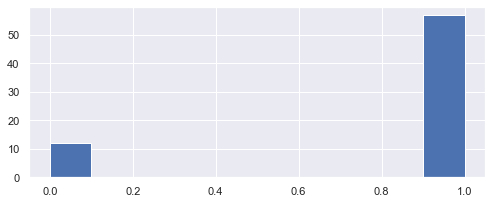

In [495]:
print(X['injustice'].value_counts())
print(X['injustice'].value_counts(normalize=True))
X['injustice'].hist()

1    36
0    33
Name: interest, dtype: int64
1    0.521739
0    0.478261
Name: interest, dtype: float64


<AxesSubplot:>

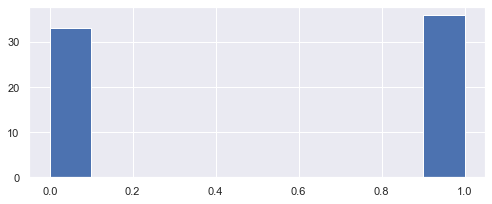

In [496]:
print(X['interest'].value_counts())
print(X['interest'].value_counts(normalize=True))
X['interest'].hist()

0    35
1    34
Name: interest_parents, dtype: int64
0    0.507246
1    0.492754
Name: interest_parents, dtype: float64


<AxesSubplot:>

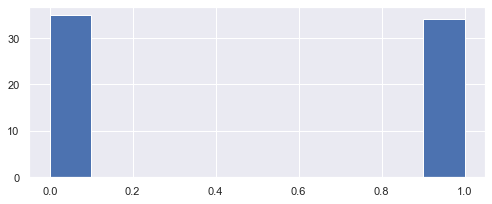

In [497]:
print(X['interest_parents'].value_counts())
print(X['interest_parents'].value_counts(normalize=True))
X['interest_parents'].hist()

1    47
0    22
Name: vote_parents, dtype: int64
1    0.681159
0    0.318841
Name: vote_parents, dtype: float64


<AxesSubplot:>

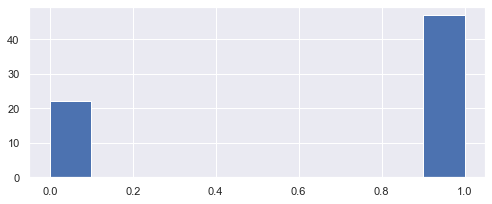

In [498]:
print(X['vote_parents'].value_counts())
print(X['vote_parents'].value_counts(normalize=True))
X['vote_parents'].hist()

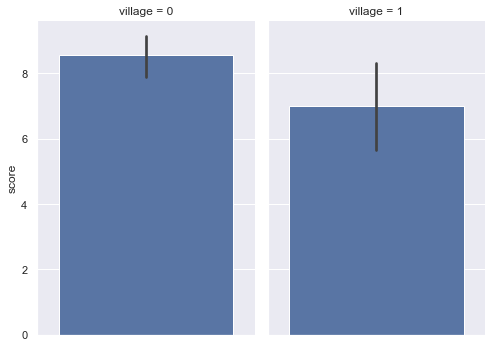

In [499]:
sns.catplot(y="score",col = 'village',data=X, kind="bar", height=5, aspect=.7)

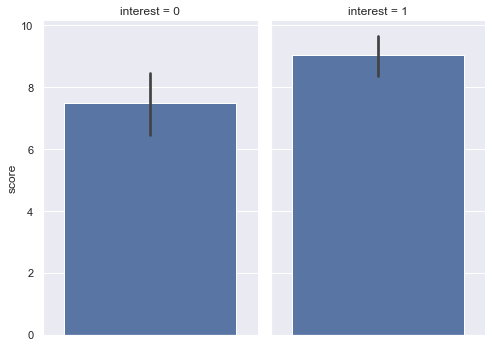

In [500]:
sns.catplot(y="score",col = 'interest',data=X, kind="bar", height=5, aspect=.7)

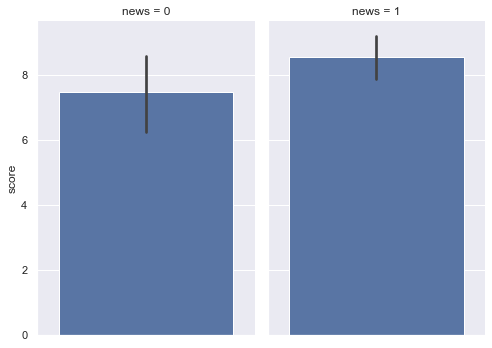

In [501]:
sns.catplot(y="score",col = 'news',data=X, kind="bar", height=5, aspect=.7)

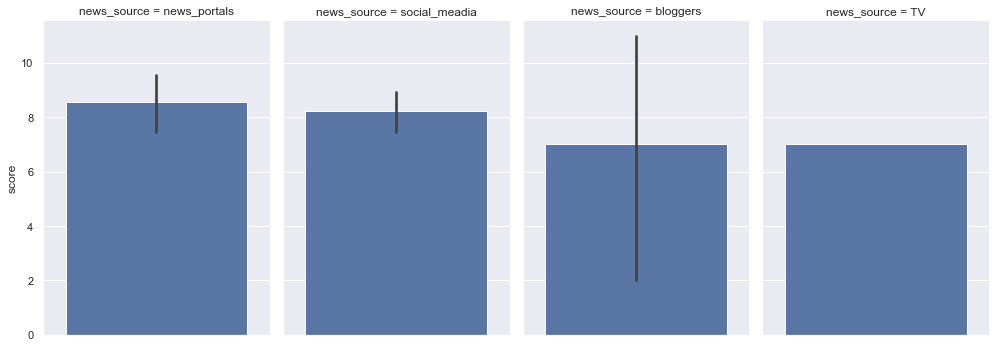

In [502]:
sns.catplot(y="score",col = 'news_source',data=X, kind="bar", height=5, aspect=.7)

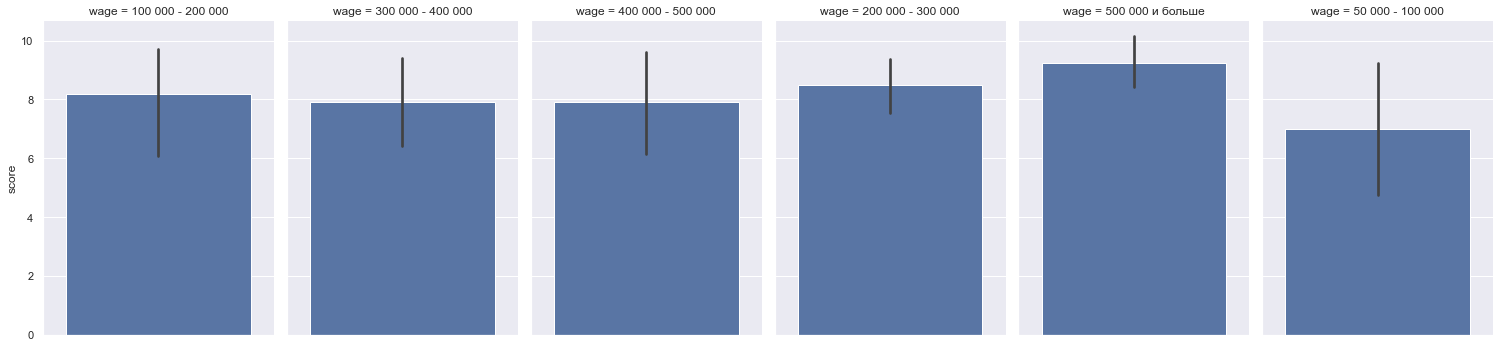

In [503]:
sns.catplot(y="score",col = 'wage',data=X, kind="bar", height=5, aspect=.7)

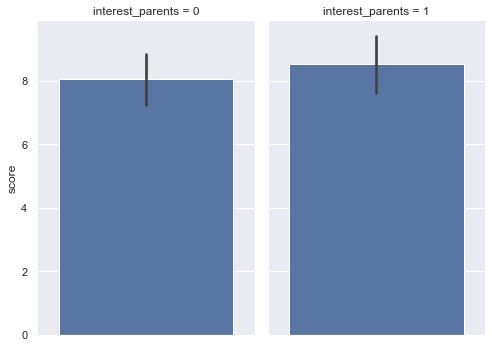

In [504]:
sns.catplot(y="score",col = 'interest_parents',data=X, kind="bar", height=5, aspect=.7)

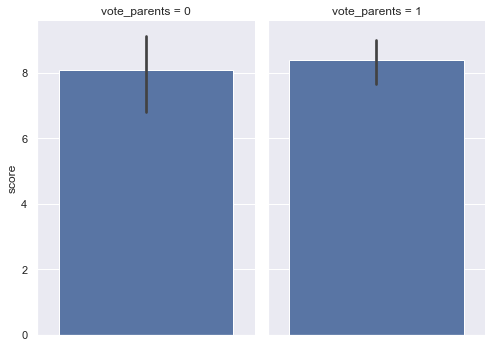

In [505]:
sns.catplot(y="score",col = 'vote_parents',data=X, kind="bar", height=5, aspect=.7)

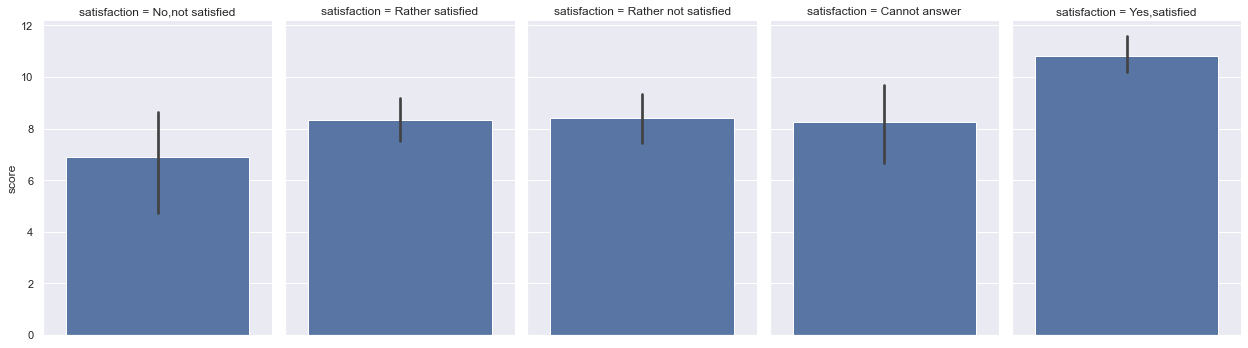

In [506]:
sns.catplot(y="score",col = 'satisfaction',data=X, kind="bar", height=5, aspect=.7)

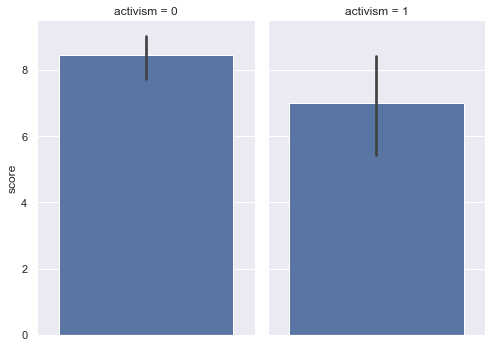

In [507]:
sns.catplot(y="score",col = 'activism',data=X, kind="bar", height=5, aspect=.7)

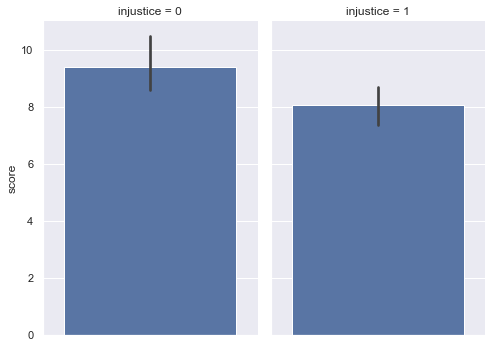

In [508]:
sns.catplot(y="score",col = 'injustice',data=X, kind="bar", height=5, aspect=.7)

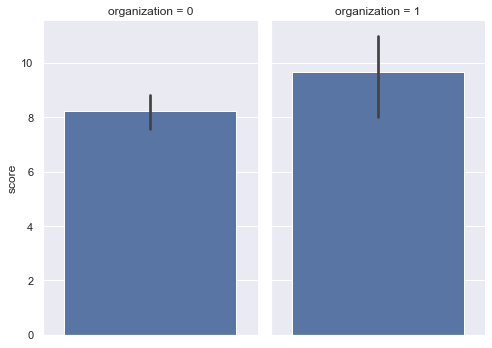

In [509]:
sns.catplot(y="score",col = 'organization',data=X, kind="bar", height=5, aspect=.7)